In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For visualization
%matplotlib inline

Number of orbitals: 2
Shape of one-body terms (h): (2, 2)
Shape of two-body terms (g): (2, 2, 2, 2)
Constant energy term: -1.5


<function matplotlib.pyplot.show(close=None, block=None)>

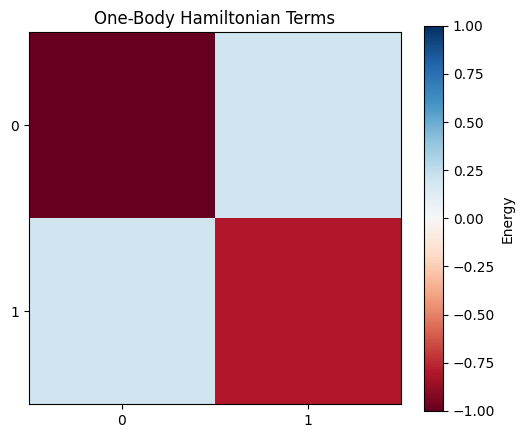

In [2]:
# Create a simple hamiltonian with 2 spatial orbitals

# One-body terms (h) - 2x2 matrix
h = np.array([
    [-1.0, 0.2],  # h_{00}, h_{01}
    [0.2, -0.8]   # h_{10}, h_{11}
])

# Two-body terms (g) - 2x2x2x2 tensor
g = np.zeros((2, 2, 2, 2))
# Add electron-electron repulsion terms
g[0, 1, 0, 1] = 0.5  # g_{0101} - Repulsion between electrons in orbitals 0 and 1
g[1, 0, 1, 0] = 0.5  # g_{1010} - Same due to symmetry

# Optional constant term (e.g., nuclear repulsion)
constant = -1.5

# Create the hamiltonian
class FermionHamiltonian:
    def __init__(self, h, g, constant=0.0):
        self.h = h
        self.g = g
        self.constant = constant
        self.n_orbitals = h.shape[0]

    def __add__(self, other):
        h_sum = self.h + other.h
        g_sum = self.g + other.g
        constant_sum = self.constant + other.constant
        return FermionHamiltonian(h_sum, g_sum, constant=constant_sum)

    def __mul__(self, scalar):
        h_scaled = self.h * scalar
        g_scaled = self.g * scalar
        constant_scaled = self.constant * scalar
        return FermionHamiltonian(h_scaled, g_scaled, constant=constant_scaled)

    def __rmul__(self, scalar):
        return self.__mul__(scalar)

    def __eq__(self, other):
        return (np.array_equal(self.h, other.h) and
                np.array_equal(self.g, other.g) and
                self.constant == other.constant)

    def copy(self):
        return FermionHamiltonian(
            np.copy(self.h),
            np.copy(self.g),
            constant=self.constant
        )

ham = FermionHamiltonian(h, g, constant=constant)

print(f"Number of orbitals: {ham.n_orbitals}")
print(f"Shape of one-body terms (h): {ham.h.shape}")
print(f"Shape of two-body terms (g): {ham.g.shape}")
print(f"Constant energy term: {ham.constant}")

# Visualize the one-body terms
plt.figure(figsize=(6, 5))
plt.imshow(ham.h, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='Energy')
plt.title('One-Body Hamiltonian Terms')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show

In [3]:
# Let's explore some methods of the FermionHamiltonian class

# Create another simple hamiltonian
h2 = np.array([[-0.5, 0.1],
               [0.1, -0.3]])
g2 = np.zeros((2, 2, 2, 2))
g2[0, 1, 0, 1] = 0.2
ham2 = FermionHamiltonian(h2, g2, constant=0.5)

# 1. Addition of hamiltonians
ham_sum = ham + ham2
print("Sum of hamiltonians:")
print(f"One-body terms:\n{ham_sum.h}")
print(f"Two-body terms[0,1,0,1]: {ham_sum.g[0,1,0,1]}")  # Should be 0.7
print(f"Constant: {ham_sum.constant}")                   # Should be -1.0

# 2. Scalar multiplication
ham_scaled = 2.0 * ham
print("\nScaled hamiltonian (2.0 * ham):")
print(f"One-body terms:\n{ham_scaled.h}")
print(f"Two-body terms[0,1,0,1]: {ham_scaled.g[0,1,0,1]}")  # Should be 1.0
print(f"Constant: {ham_scaled.constant}")                   # Should be -3.0

# 3. Creating a copy
ham_copy = ham.copy()
print("\nOriginal vs Copy (are they the same object?):")
print(f"Same object: {ham is ham_copy}")   # Should be False
print(f"Equal content: {ham == ham_copy}")  # Should be True

Sum of hamiltonians:
One-body terms:
[[-1.5  0.3]
 [ 0.3 -1.1]]
Two-body terms[0,1,0,1]: 0.7
Constant: -1.0

Scaled hamiltonian (2.0 * ham):
One-body terms:
[[-2.   0.4]
 [ 0.4 -1.6]]
Two-body terms[0,1,0,1]: 1.0
Constant: -3.0

Original vs Copy (are they the same object?):
Same object: False
Equal content: True


In [4]:
def chemical_to_physics_ordering(g_chemical):
    """Convert two-body tensor from chemical to physics ordering."""
    n = g_chemical.shape[0]
    g_physics = np.zeros((n, n, n, n))

    for p in range(n):
        for q in range(n):
            for r in range(n):
                for s in range(n):
                    g_physics[p, q, r, s] = g_chemical[p, q, s, r]

    return g_physics

def physics_to_chemical_ordering(g_physics):
    """Convert two-body tensor from physics to chemical ordering."""
    n = g_physics.shape[0]
    g_chemical = np.zeros((n, n, n, n))

    for p in range(n):
        for q in range(n):
            for r in range(n):
                for s in range(n):
                    g_chemical[p, q, r, s] = g_physics[p, q, s, r]

    return g_chemical

# Create a simple g tensor in chemical ordering
g_chem = np.zeros((2, 2, 2, 2))
g_chem[0, 1, 0, 1] = 0.5  # g_{0101} in chemical ordering

# Convert to physics ordering
g_phys = chemical_to_physics_ordering(g_chem)

print("Original g tensor (chemical ordering):")
print(f"g[0, 1, 0, 1] = {g_chem[0, 1, 0, 1]}")  # Should be 0.5

print("\nConverted g tensor (physics ordering):")
# In physics ordering, the indices are rearranged
print(f"g[0, 1, 1, 0] = {g_phys[0, 1, 1, 0]}")  # Should be 0.5

# Convert back to chemical ordering to verify
g_chem_again = physics_to_chemical_ordering(g_phys)
print("\nConverted back to chemical ordering:")
print(f"g[0, 1, 0, 1] = {g_chem_again[0, 1, 0, 1]}")  # Should be 0.5 again

Original g tensor (chemical ordering):
g[0, 1, 0, 1] = 0.5

Converted g tensor (physics ordering):
g[0, 1, 1, 0] = 0.5

Converted back to chemical ordering:
g[0, 1, 0, 1] = 0.5
